<a href="https://colab.research.google.com/github/adamlutzz/DS-Unit-1-Sprint-2-Data-Wrangling-and-Storytelling/blob/master/module3-make-explanatory-visualizations/LS_DS_123_Make_Explanatory_Visualizations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

_Lambda School Data Science_

# Make Explanatory Visualizations

### Objectives

- identify misleading visualizations and how to fix them
- use Seaborn to visualize distributions and relationships with continuous and discrete variables
- add emphasis and annotations to transform visualizations from exploratory to explanatory
- remove clutter from visualizations

### Links

- [How to Spot Visualization Lies](https://flowingdata.com/2017/02/09/how-to-spot-visualization-lies/)
- [Visual Vocabulary - Vega Edition](http://ft.com/vocabulary)
- [Choosing a Python Visualization Tool flowchart](http://pbpython.com/python-vis-flowchart.html)
- [Searborn example gallery](http://seaborn.pydata.org/examples/index.html) & [tutorial](http://seaborn.pydata.org/tutorial.html)
- [Strong Titles Are The Biggest Bang for Your Buck](http://stephanieevergreen.com/strong-titles/)
- [Remove to improve (the data-ink ratio)](https://www.darkhorseanalytics.com/blog/data-looks-better-naked)
- [How to Generate FiveThirtyEight Graphs in Python](https://www.dataquest.io/blog/making-538-plots/)

# Avoid Misleading Visualizations

Did you find/discuss any interesting misleading visualizations in your Walkie Talkie?

## What makes a visualization misleading?

[5 Ways Writers Use Misleading Graphs To Manipulate You](https://venngage.com/blog/misleading-graphs/)

## Two y-axes

<img src="https://kieranhealy.org/files/misc/two-y-by-four-sm.jpg" width="800">
 
 Other Examples: 
 - [Spurious Correlations](https://tylervigen.com/spurious-correlations)
 - <https://blog.datawrapper.de/dualaxis/>
 - <https://kieranhealy.org/blog/archives/2016/01/16/two-y-axes/>
 - <http://www.storytellingwithdata.com/blog/2016/2/1/be-gone-dual-y-axis>

##  Y-axis doesn't start at zero.

<img src="https://i.pinimg.com/originals/22/53/a9/2253a944f54bb61f1983bc076ff33cdd.jpg" width="600">

## Pie Charts are bad

<img src="https://i1.wp.com/flowingdata.com/wp-content/uploads/2009/11/Fox-News-pie-chart.png?fit=620%2C465&ssl=1" width="600">

## Pie charts that omit data are extra bad
 
- A guy makes a misleading chart that goes viral

 What does this chart imply at first glance? You don't want your user to have to do a lot of work in order to be able to interpret you graph correctly. You want that first-glance conclusions to be the correct ones.

 <img src="https://pbs.twimg.com/media/DiaiTLHWsAYAEEX?format=jpg&name=medium" width='600'>
 
 <https://twitter.com/michaelbatnick/status/1019680856837849090?lang=en>
 
- It gets picked up by overworked journalists (assuming incompetency before malice)
 
 <https://www.marketwatch.com/story/this-1-chart-puts-mega-techs-trillions-of-market-value-into-eye-popping-perspective-2018-07-18>
 
- Even after the chart's implications have been refuted, it's hard a bad (although compelling) visualization from being passed around.

 <https://www.linkedin.com/pulse/good-bad-pie-charts-karthik-shashidhar/>

**["yea I understand a pie chart was probably not the best choice to present this data."](https://twitter.com/michaelbatnick/status/1037036440494985216)**

## Pie Charts that compare unrelated things are next-level extra bad

<img src="http://www.painting-with-numbers.com/download/document/186/170403+Legalizing+Marijuana+Graph.jpg" width="600">


## Be careful about how you use volume to represent quantities:

radius vs diameter vs volume

<img src="https://static1.squarespace.com/static/5bfc8dbab40b9d7dd9054f41/t/5c32d86e0ebbe80a25873249/1546836082961/5474039-25383714-thumbnail.jpg?format=1500w" width="600">

## Don't cherrypick timelines or specific subsets of your data:

<img src="https://wattsupwiththat.com/wp-content/uploads/2019/02/Figure-1-1.png" width="600">

Look how specifically the writer has selected what years to show in the legend on the right side.

<https://wattsupwiththat.com/2019/02/24/strong-arctic-sea-ice-growth-this-year/>

Try the tool that was used to make the graphic for yourself

<http://nsidc.org/arcticseaicenews/charctic-interactive-sea-ice-graph/>
                                                                                           

## Use Relative units rather than Absolute Units

<img src="https://imgs.xkcd.com/comics/heatmap_2x.png" width="600">

## Avoid 3D graphs unless having the extra dimension is effective

Usually you can Split 3D graphs into multiple 2D graphs

3D graphs that are interactive can be very cool. (See Plotly and Bokeh)

<img src="https://thumbor.forbes.com/thumbor/1280x868/https%3A%2F%2Fblogs-images.forbes.com%2Fthumbnails%2Fblog_1855%2Fpt_1855_811_o.jpg%3Ft%3D1339592470" width="600">

## Don't go against typical conventions

<img src="http://www.callingbullshit.org/twittercards/tools_misleading_axes.png" width="600">

# Tips for choosing an appropriate visualization:

## Use Appropriate "Visual Vocabulary"

[Visual Vocabulary - Vega Edition](http://ft.com/vocabulary)

## What are the properties of your data?
- Is your primary variable of interest continuous or discrete?
- Is in wide or long (tidy) format?
- Does your visualization involve multiple variables?
- How many dimensions do you need to include on your plot?

Can you express the main idea of your visualization in a single sentence?

How hard does your visualization make the user work in order to draw the intended conclusion?

## Which Visualization tool is most appropriate? 

[Choosing a Python Visualization Tool flowchart](http://pbpython.com/python-vis-flowchart.html)

## Anatomy of a Matplotlib Plot

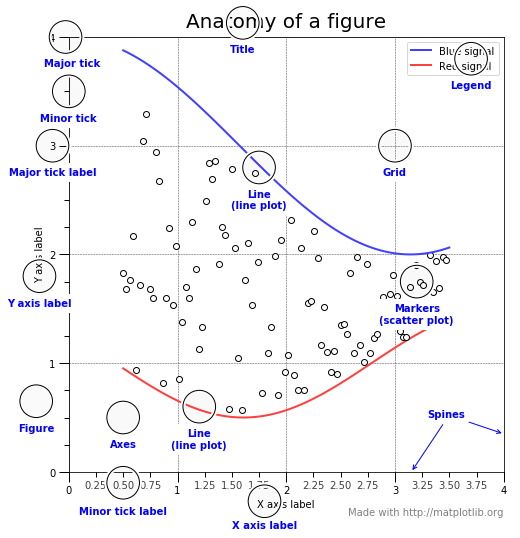

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator, MultipleLocator, FuncFormatter

np.random.seed(19680801)

X = np.linspace(0.5, 3.5, 100)
Y1 = 3+np.cos(X)
Y2 = 1+np.cos(1+X/0.75)/2
Y3 = np.random.uniform(Y1, Y2, len(X))

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1, aspect=1)


def minor_tick(x, pos):
    if not x % 1.0:
        return ""
    return "%.2f" % x

ax.xaxis.set_major_locator(MultipleLocator(1.000))
ax.xaxis.set_minor_locator(AutoMinorLocator(4))
ax.yaxis.set_major_locator(MultipleLocator(1.000))
ax.yaxis.set_minor_locator(AutoMinorLocator(4))
ax.xaxis.set_minor_formatter(FuncFormatter(minor_tick))

ax.set_xlim(0, 4)
ax.set_ylim(0, 4)

ax.tick_params(which='major', width=1.0)
ax.tick_params(which='major', length=10)
ax.tick_params(which='minor', width=1.0, labelsize=10)
ax.tick_params(which='minor', length=5, labelsize=10, labelcolor='0.25')

ax.grid(linestyle="--", linewidth=0.5, color='.25', zorder=-10)

ax.plot(X, Y1, c=(0.25, 0.25, 1.00), lw=2, label="Blue signal", zorder=10)
ax.plot(X, Y2, c=(1.00, 0.25, 0.25), lw=2, label="Red signal")
ax.plot(X, Y3, linewidth=0,
        marker='o', markerfacecolor='w', markeredgecolor='k')

ax.set_title("Anatomy of a figure", fontsize=20, verticalalignment='bottom')
ax.set_xlabel("X axis label")
ax.set_ylabel("Y axis label")

ax.legend()


def circle(x, y, radius=0.15):
    from matplotlib.patches import Circle
    from matplotlib.patheffects import withStroke
    circle = Circle((x, y), radius, clip_on=False, zorder=10, linewidth=1,
                    edgecolor='black', facecolor=(0, 0, 0, .0125),
                    path_effects=[withStroke(linewidth=5, foreground='w')])
    ax.add_artist(circle)


def text(x, y, text):
    ax.text(x, y, text, backgroundcolor="white",
            ha='center', va='top', weight='bold', color='blue')

# Minor tick
circle(0.50, -0.10)
text(0.50, -0.32, "Minor tick label")

# Major tick
circle(-0.03, 4.00)
text(0.03, 3.80, "Major tick")

# Minor tick
circle(0.00, 3.50)
text(0.00, 3.30, "Minor tick")

# Major tick label
circle(-0.15, 3.00)
text(-0.15, 2.80, "Major tick label")

# X Label
circle(1.80, -0.27)
text(1.80, -0.45, "X axis label")

# Y Label
circle(-0.27, 1.80)
text(-0.27, 1.6, "Y axis label")

# Title
circle(1.60, 4.13)
text(1.60, 3.93, "Title")

# Blue plot
circle(1.75, 2.80)
text(1.75, 2.60, "Line\n(line plot)")

# Red plot
circle(1.20, 0.60)
text(1.20, 0.40, "Line\n(line plot)")

# Scatter plot
circle(3.20, 1.75)
text(3.20, 1.55, "Markers\n(scatter plot)")

# Grid
circle(3.00, 3.00)
text(3.00, 2.80, "Grid")

# Legend
circle(3.70, 3.80)
text(3.70, 3.60, "Legend")

# Axes
circle(0.5, 0.5)
text(0.5, 0.3, "Axes")

# Figure
circle(-0.3, 0.65)
text(-0.3, 0.45, "Figure")

color = 'blue'
ax.annotate('Spines', xy=(4.0, 0.35), xytext=(3.3, 0.5),
            weight='bold', color=color,
            arrowprops=dict(arrowstyle='->',
                            connectionstyle="arc3",
                            color=color))

ax.annotate('', xy=(3.15, 0.0), xytext=(3.45, 0.45),
            weight='bold', color=color,
            arrowprops=dict(arrowstyle='->',
                            connectionstyle="arc3",
                            color=color))

ax.text(4.0, -0.4, "Made with http://matplotlib.org",
        fontsize=10, ha="right", color='.5')

plt.show()

### Simple Web Scraper with IMDb

In [33]:
from requests import get

url = 'https://www.imdb.com/title/tt6105098/ratings?ref_=tt_ov_rt'
response = get(url)
print(response.text[:500])











<!DOCTYPE html>
<html
    xmlns:og="http://ogp.me/ns#"
    xmlns:fb="http://www.facebook.com/2008/fbml">
    <head>
         
        <meta charset="utf-8">
        <meta http-equiv="X-UA-Compatible" content="IE=edge">

    <meta name="apple-itunes-app" content="app-id=342792525, app-argument=imdb:///title/tt6105098?src=mdot">



        <script type="text/javascript">var IMDbTimer={starttime: new Date().getTime(),pt:'java'};</script>

<script>
    if (typeof uet == 'function') {
     


In [34]:
from bs4 import BeautifulSoup

html_soup = BeautifulSoup(response.text, 'html.parser')
type(html_soup)

bs4.BeautifulSoup

In [35]:
vote_container = html_soup.find_all('div', class_ ='leftAligned')
vote_container[1:11]

[<div class="leftAligned">10,695</div>,
 <div class="leftAligned">6,858</div>,
 <div class="leftAligned">12,577</div>,
 <div class="leftAligned">13,414</div>,
 <div class="leftAligned">7,163</div>,
 <div class="leftAligned">3,298</div>,
 <div class="leftAligned">1,528</div>,
 <div class="leftAligned">1,029</div>,
 <div class="leftAligned">779</div>,
 <div class="leftAligned">2,624</div>]

In [36]:
votes = [containers.text for containers in vote_container][1:11]
votes

['10,695',
 '6,858',
 '12,577',
 '13,414',
 '7,163',
 '3,298',
 '1,528',
 '1,029',
 '779',
 '2,624']

In [37]:
list(map(int, votes))

ValueError: ignored

In [38]:
urls = ['https://www.imdb.com/title/tt6105098/ratings?ref_=tt_ov_rt',     # Lion King (2019)
        'https://www.imdb.com/title/tt0110357/ratings?ref_=tt_ov_rt',     # Lion King (1994)
        'https://www.imdb.com/title/tt6139732/ratings?ref_=tt_ov_rt',     # Aladdin (2019)
        'https://www.imdb.com/title/tt0103639/ratings?ref_=tt_ov_rt']     # Aladdin (1992) w/ Robin Williams
votes_list = []
for url in urls:
    # Get raw HTML response
    response = get(url)
    
    # Convert to BS Object
    html_soup = BeautifulSoup(response.text, 'html.parser')
    
    # Find vote containers and extract star ratings
    vote_containers = html_soup.find_all('div', class_ = 'leftAligned')
    votes = [containers.text for containers in vote_containers][1:11]
    
    
    # Append to initial list
    votes_list.append(votes)
    
print(votes_list)

[['10,695', '6,858', '12,577', '13,414', '7,163', '3,298', '1,528', '1,029', '779', '2,624'], ['254,677', '219,235', '213,602', '100,743', '33,087', '13,246', '5,344', '3,009', '1,969', '4,956'], ['14,796', '11,769', '22,720', '20,300', '8,615', '3,343', '1,511', '915', '666', '2,395'], ['58,911', '61,229', '111,136', '61,573', '20,592', '7,057', '2,593', '1,199', '689', '1,249']]


In [39]:
import pandas as pd
movies = ['The Lion King (2019)', 'The Lion King (1994)', 'Aladdin (2019)', 'Aladdin (1992)']
df = pd.DataFrame(votes_list)
df = df.T
df.columns = movies
df = df.apply(lambda x: x.str.replace(',',''))
df['Star Rating'] = range(1,11)[::-1]
df

,The Lion King (2019),The Lion King (1994),Aladdin (2019),Aladdin (1992),Star Rating
0,10695,254677,14796,58911,10
1,6858,219235,11769,61229,9
2,12577,213602,22720,111136,8
3,13414,100743,20300,61573,7
4,7163,33087,8615,20592,6
5,3298,13246,3343,7057,5
6,1528,5344,1511,2593,4
7,1029,3009,915,1199,3
8,779,1969,666,689,2
9,2624,4956,2395,1249,1


In [40]:
# Convert df into tidy format
df_tidy = df.melt(id_vars='Star Rating')
df_tidy = df_tidy.rename(columns={'variable': 'Movie', 'value': 'Number of Votes'})
df_tidy['Number of Votes'] = pd.to_numeric(df_tidy['Number of Votes'])
df_tidy.head()

,Star Rating,Movie,Number of Votes
0,10,The Lion King (2019),10695
1,9,The Lion King (2019),6858
2,8,The Lion King (2019),12577
3,7,The Lion King (2019),13414
4,6,The Lion King (2019),7163


In [58]:
df_tidy['Vote Percent'] = df_tidy.groupby('Movie')['Number of Votes'].apply(lambda x: x / x.sum() * 100)
df_tidy.head(20)

,Star Rating,Movie,Number of Votes,Vote Percent
0,10,The Lion King (2019),10695,17.835404
1,9,The Lion King (2019),6858,11.436671
2,8,The Lion King (2019),12577,20.973901
3,7,The Lion King (2019),13414,22.369716
4,6,The Lion King (2019),7163,11.945301
5,5,The Lion King (2019),3298,5.499875
6,4,The Lion King (2019),1528,2.548153
7,3,The Lion King (2019),1029,1.716001
8,2,The Lion King (2019),779,1.299091
9,1,The Lion King (2019),2624,4.375886


In [42]:
df_tidy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 4 columns):
Star Rating        40 non-null int64
Movie              40 non-null object
Number of Votes    40 non-null int64
Vote Percent       40 non-null float64
dtypes: float64(1), int64(2), object(1)
memory usage: 1.3+ KB


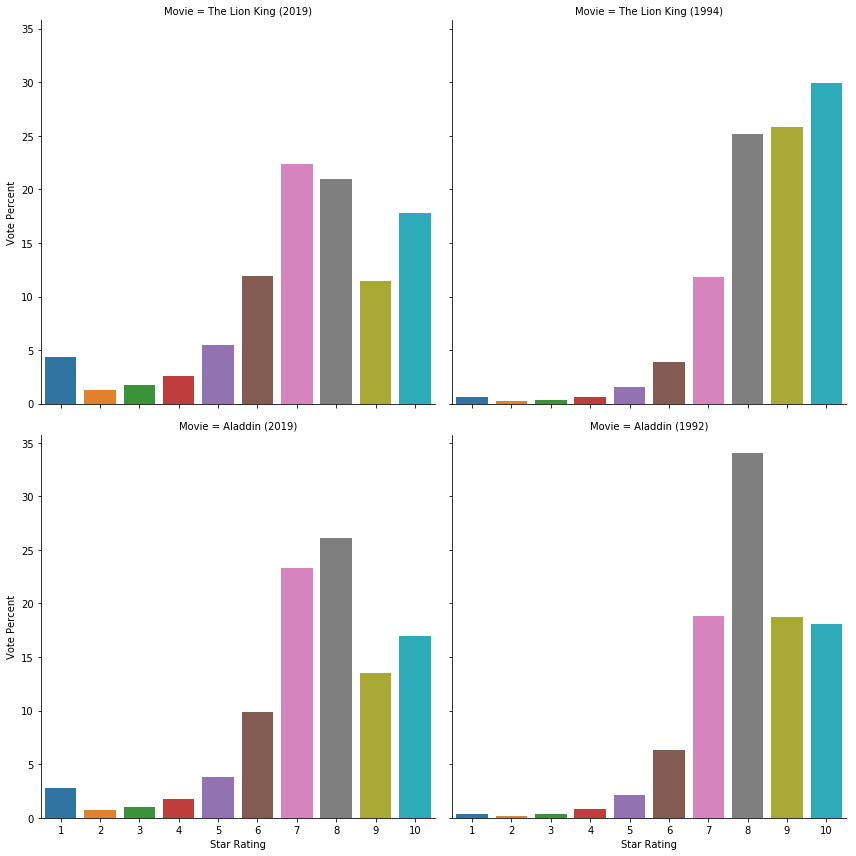

In [43]:
import seaborn as sns

sns.catplot(x='Star Rating', y='Vote Percent', col='Movie', col_wrap=2, height=6, kind='bar', data=df_tidy);

# Making Explanatory Visualizations with Seaborn

Today we will reproduce this [example by FiveThirtyEight:](https://fivethirtyeight.com/features/al-gores-new-movie-exposes-the-big-flaw-in-online-movie-ratings/)



In [44]:
from IPython.display import display, Image

url = 'https://fivethirtyeight.com/wp-content/uploads/2017/09/mehtahickey-inconvenient-0830-1.png'
example = Image(url=url, width=400)

display(example)

Using this data: https://github.com/fivethirtyeight/data/tree/master/inconvenient-sequel

Links
- [Strong Titles Are The Biggest Bang for Your Buck](http://stephanieevergreen.com/strong-titles/)
- [Remove to improve (the data-ink ratio)](https://www.darkhorseanalytics.com/blog/data-looks-better-naked)
- [How to Generate FiveThirtyEight Graphs in Python](https://www.dataquest.io/blog/making-538-plots/)

## Make prototypes

This  helps us understand the problem

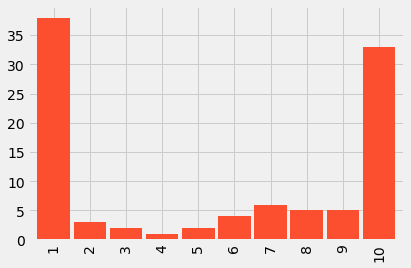

In [46]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


plt.style.use('fivethirtyeight')

fake = pd.Series([38, 3, 2, 1, 2, 4, 6, 5, 5, 33], 
                 index=range(1,11))

fake.plot.bar(color='C1', width=0.9);

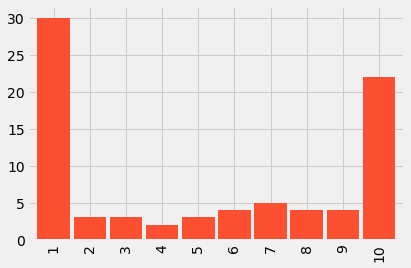

In [47]:
fake2 = pd.Series(
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1 ,1 ,1 ,1 ,
     2, 2, 2, 
     3, 3, 3,
     4, 4,
     5, 5, 5,
     6, 6, 6, 6,
     7, 7, 7, 7, 7,
     8, 8, 8, 8,
     9, 9, 9, 9, 
     10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10])

fake2.value_counts().sort_index().plot.bar(color='C1', width=0.9);

## Annotate with text

Text(0, 0.5, 'Percent of Total Votes')

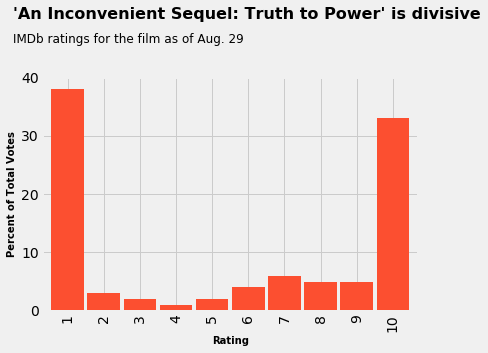

In [48]:
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')
fake.plot.bar(color='C1', width=0.9);
plt.text(x=-1.5, y=50, fontsize=16, fontweight='bold',
        s = "'An Inconvenient Sequel: Truth to Power' is divisive")
plt.text(x=-1.5, y=46, fontsize=12,
        s = 'IMDb ratings for the film as of Aug. 29')
plt.yticks(range(0,41,10))
plt.xlabel('Rating', fontsize=10, fontweight='bold')
plt.ylabel('Percent of Total Votes', fontsize=10, fontweight='bold')

## Reproduce with real data

In [49]:
df = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/inconvenient-sequel/ratings.csv')
print(df.shape)
df.head()

(80053, 27)


,timestamp,respondents,category,link,average,mean,median,1_votes,2_votes,3_votes,4_votes,5_votes,6_votes,7_votes,8_votes,9_votes,10_votes,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct,9_pct,10_pct
0,2017-07-17 12:28:32.785639,402,Males,http://www.imdb.com/title/tt6322922/ratings-male,4.6,5.0,2,197,7,7,3,7,7,11,8,20,135,49.0,1.7,1.7,0.7,1.7,1.7,2.7,2.0,5.0,33.6
1,2017-07-17 12:28:33.025600,78,Females,http://www.imdb.com/title/tt6322922/ratings-fe...,6.9,7.7,10,16,1,0,1,1,0,3,4,3,49,20.5,1.3,0.0,1.3,1.3,0.0,3.8,5.1,3.8,62.8
2,2017-07-17 12:28:33.273919,4,Aged under 18,http://www.imdb.com/title/tt6322922/ratings-age_1,4.2,4.2,3,2,0,0,0,1,0,0,0,0,1,50.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,25.0
3,2017-07-17 12:28:33.495325,4,Males under 18,http://www.imdb.com/title/tt6322922/ratings-ma...,4.2,4.2,3,2,0,0,0,1,0,0,0,0,1,50.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,25.0
4,2017-07-17 12:28:33.722849,130,Aged 18-29,http://www.imdb.com/title/tt6322922/ratings-age_2,6.3,6.5,9,41,0,3,1,2,3,6,4,6,64,31.5,0.0,2.3,0.8,1.5,2.3,4.6,3.1,4.6,49.2


In [50]:
df.category.value_counts()

Males under 18        4216
Females Aged 30-44    4216
Top 1000 voters       4216
Males                 4216
IMDb users            4216
Non-US users          4216
Females Aged 18-29    4216
Aged 18-29            4216
Males Aged 45+        4216
Males Aged 30-44      4216
Aged 30-44            4216
Aged under 18         4216
US users              4216
Males Aged 18-29      4216
Females Aged 45+      4216
Females               4216
Aged 45+              4216
IMDb staff            4216
Females under 18      4165
Name: category, dtype: int64

In [51]:
df.dtypes

timestamp       object
respondents      int64
category        object
link            object
average        float64
mean           float64
median           int64
1_votes          int64
2_votes          int64
3_votes          int64
4_votes          int64
5_votes          int64
6_votes          int64
7_votes          int64
8_votes          int64
9_votes          int64
10_votes         int64
1_pct          float64
2_pct          float64
3_pct          float64
4_pct          float64
5_pct          float64
6_pct          float64
7_pct          float64
8_pct          float64
9_pct          float64
10_pct         float64
dtype: object

In [52]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['timestamp'].describe()

count                          80053
unique                         80053
top       2017-07-24 23:00:02.760781
freq                               1
first     2017-07-17 12:28:32.785639
last      2017-08-29 23:10:06.218251
Name: timestamp, dtype: object

In [53]:
df_imdb = df[df.category == 'IMDb users']
df_imdb.shape

(4216, 27)

In [54]:
final = df_imdb.tail(1)
final

,timestamp,respondents,category,link,average,mean,median,1_votes,2_votes,3_votes,4_votes,5_votes,6_votes,7_votes,8_votes,9_votes,10_votes,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct,9_pct,10_pct
80052,2017-08-29 23:10:06.218251,2662,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1021,69,38,25,55,110,154,147,146,897,38.4,2.6,1.4,0.9,2.1,4.1,5.8,5.5,5.5,33.7


In [55]:
# two different ways to change it (I am not entirely sure what we are changing here)
columns = ['{}_pct'. format(i) for i in range(1,11)]
columns = [f'{i}_pct' for i in range(1,11)]
columns

['1_pct',
 '2_pct',
 '3_pct',
 '4_pct',
 '5_pct',
 '6_pct',
 '7_pct',
 '8_pct',
 '9_pct',
 '10_pct']

In [56]:
data = final[columns]
data = data.T
data.index = range(1,11)
data.head(10)

,80052
1,38.4
2,2.6
3,1.4
4,0.9
5,2.1
6,4.1
7,5.8
8,5.5
9,5.5
10,33.7


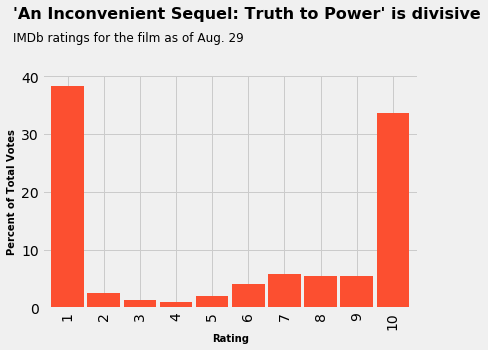

In [57]:
plt.style.use('fivethirtyeight')
data.plot.bar(color='C1', width=0.9, legend=False);
plt.text(x=-1.5, y=50, fontsize=16, fontweight='bold',
        s = "'An Inconvenient Sequel: Truth to Power' is divisive")
plt.text(x=-1.5, y=46, fontsize=12,
        s = 'IMDb ratings for the film as of Aug. 29')
plt.yticks(range(0,41,10))
plt.xlabel('Rating', fontsize=10, fontweight='bold')
plt.ylabel('Percent of Total Votes', fontsize=10, fontweight='bold');

# ASSIGNMENT

Replicate the lesson code. I recommend that you [do not copy-paste](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit).

# STRETCH OPTIONS

#### 1) Reproduce another example from [FiveThityEight's shared data repository](https://data.fivethirtyeight.com/).

#### 2) Reproduce one of the following using a library other than Seaborn or Matplotlib.

For example:
- [thanksgiving-2015](https://fivethirtyeight.com/features/heres-what-your-part-of-america-eats-on-thanksgiving/) (try the [`altair`](https://altair-viz.github.io/gallery/index.html#maps) library)
- [candy-power-ranking](https://fivethirtyeight.com/features/the-ultimate-halloween-candy-power-ranking/) (try the [`statsmodels`](https://www.statsmodels.org/stable/index.html) library)
- or another example of your choice!

#### 3) Make more charts!

Choose a chart you want to make, from [Visual Vocabulary - Vega Edition](http://ft.com/vocabulary).

Find the chart in an example gallery of a Python data visualization library:
- [Seaborn](http://seaborn.pydata.org/examples/index.html)
- [Altair](https://altair-viz.github.io/gallery/index.html)
- [Matplotlib](https://matplotlib.org/gallery.html)
- [Pandas](https://pandas.pydata.org/pandas-docs/stable/visualization.html)

Reproduce the chart. [Optionally, try the "Ben Franklin Method."](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit) If you want, experiment and make changes.

Take notes. Consider sharing your work with your cohort!









In [64]:
import pandas as pd

url = 'https://raw.githubusercontent.com/fivethirtyeight/russian-troll-tweets/master/IRAhandle_tweets_1.csv'

test = pd.read_csv(url)
print(test.shape)
test.head()


(243891, 21)


,external_author_id,author,content,region,language,publish_date,harvested_date,following,followers,updates,post_type,account_type,retweet,account_category,new_june_2018,alt_external_id,tweet_id,article_url,tco1_step1,tco2_step1,tco3_step1
0,906000000000000000,10_GOP,"""We have a sitting Democrat US Senator on tria...",Unknown,English,10/1/2017 19:58,10/1/2017 19:59,1052,9636,253,NaN,Right,0,RightTroll,0,905874659358453760,914580356430536707,http://twitter.com/905874659358453760/statuses...,https://twitter.com/10_gop/status/914580356430...,NaN,NaN
1,906000000000000000,10_GOP,Marshawn Lynch arrives to game in anti-Trump s...,Unknown,English,10/1/2017 22:43,10/1/2017 22:43,1054,9637,254,NaN,Right,0,RightTroll,0,905874659358453760,914621840496189440,http://twitter.com/905874659358453760/statuses...,https://twitter.com/damienwoody/status/9145685...,NaN,NaN
2,906000000000000000,10_GOP,Daughter of fallen Navy Sailor delivers powerf...,Unknown,English,10/1/2017 22:50,10/1/2017 22:51,1054,9637,255,RETWEET,Right,1,RightTroll,0,905874659358453760,914623490375979008,http://twitter.com/905874659358453760/statuses...,https://twitter.com/10_gop/status/913231923715...,NaN,NaN
3,906000000000000000,10_GOP,JUST IN: President Trump dedicates Presidents ...,Unknown,English,10/1/2017 23:52,10/1/2017 23:52,1062,9642,256,NaN,Right,0,RightTroll,0,905874659358453760,914639143690555392,http://twitter.com/905874659358453760/statuses...,https://twitter.com/10_gop/status/914639143690...,NaN,NaN
4,906000000000000000,10_GOP,"19,000 RESPECTING our National Anthem! #StandF...",Unknown,English,10/1/2017 2:13,10/1/2017 2:13,1050,9645,246,RETWEET,Right,1,RightTroll,0,905874659358453760,914312219952861184,http://twitter.com/905874659358453760/statuses...,https://twitter.com/realDonaldTrump/status/914...,NaN,NaN


In [65]:
test_1 = pd.concat([test,test])
test.shape

(243891, 21)

In [66]:
url_name = 'https://raw.githubusercontent.com/fivethirtyeight/russian-troll-tweets/master/IRAhandle_tweets_{}.csv'
df = pd.concat([pd.read_csv(url_name.format(i)) for i in range(1, 14)])
       
print(df.shape)
df.head()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2822: DtypeWarning: Columns (0,15,20) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):
/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2822: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):
/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2822: DtypeWarning: Columns (10,20) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


(2946207, 21)


,external_author_id,author,content,region,language,publish_date,harvested_date,following,followers,updates,post_type,account_type,retweet,account_category,new_june_2018,alt_external_id,tweet_id,article_url,tco1_step1,tco2_step1,tco3_step1
0,906000000000000000,10_GOP,"""We have a sitting Democrat US Senator on tria...",Unknown,English,10/1/2017 19:58,10/1/2017 19:59,1052,9636,253,NaN,Right,0,RightTroll,0,905874659358453760,914580356430536707,http://twitter.com/905874659358453760/statuses...,https://twitter.com/10_gop/status/914580356430...,NaN,NaN
1,906000000000000000,10_GOP,Marshawn Lynch arrives to game in anti-Trump s...,Unknown,English,10/1/2017 22:43,10/1/2017 22:43,1054,9637,254,NaN,Right,0,RightTroll,0,905874659358453760,914621840496189440,http://twitter.com/905874659358453760/statuses...,https://twitter.com/damienwoody/status/9145685...,NaN,NaN
2,906000000000000000,10_GOP,Daughter of fallen Navy Sailor delivers powerf...,Unknown,English,10/1/2017 22:50,10/1/2017 22:51,1054,9637,255,RETWEET,Right,1,RightTroll,0,905874659358453760,914623490375979008,http://twitter.com/905874659358453760/statuses...,https://twitter.com/10_gop/status/913231923715...,NaN,NaN
3,906000000000000000,10_GOP,JUST IN: President Trump dedicates Presidents ...,Unknown,English,10/1/2017 23:52,10/1/2017 23:52,1062,9642,256,NaN,Right,0,RightTroll,0,905874659358453760,914639143690555392,http://twitter.com/905874659358453760/statuses...,https://twitter.com/10_gop/status/914639143690...,NaN,NaN
4,906000000000000000,10_GOP,"19,000 RESPECTING our National Anthem! #StandF...",Unknown,English,10/1/2017 2:13,10/1/2017 2:13,1050,9645,246,RETWEET,Right,1,RightTroll,0,905874659358453760,914312219952861184,http://twitter.com/905874659358453760/statuses...,https://twitter.com/realDonaldTrump/status/914...,NaN,NaN


### Fivethirtyeight Readme

index | Header | Definition
---|---|---------
1 | `external_author_id` | An author account ID from Twitter 
2 | `author` | The handle sending the tweet
3 | `content` | The text of the tweet
4 | `region` | A region classification, as [determined by Social Studio](https://help.salesforce.com/articleView?id=000199367&type=1)
5 | `language` | The language of the tweet
6 | `publish_date` | The date and time the tweet was sent
7 | `harvested_date` | The date and time the tweet was collected by Social Studio
8 | `following` | The number of accounts the handle was following at the time of the tweet
9 | `followers` | The number of followers the handle had at the time of the tweet
10 | `updates` | The number of “update actions” on the account that authored the tweet, including tweets, retweets and likes
11 | `post_type` | Indicates if the tweet was a retweet or a quote-tweet
12 | `account_type` | Specific account theme, as coded by Linvill and Warren
13 | `retweet` | A binary indicator of whether or not the tweet is a retweet
14 | `account_category` | General account theme, as coded by Linvill and Warren
15 | `new_june_2018` | A binary indicator of whether the handle was newly listed in June 2018
16 | `alt_external_id` | Reconstruction of author account ID from Twitter, derived from `article_url` variable and the first list provided to Congress
17 | `tweet_id` | Unique id assigned by twitter to each status update, derived from `article_url`
18 | `article_url` | Link to original tweet. Now redirects to "Account Suspended" page
19 | `tco1_step1` | First redirect for the first http(s)://t.co/ link in a tweet, if it exists
20 | `tco2_step1` | First redirect for the second http(s)://t.co/ link in a tweet, if it exists
21 | `tco3_step1` | First redirect for the third http(s)://t.co/ link in a tweet, if it exists

In [67]:
df.dtypes

external_author_id    object
author                object
content               object
region                object
language              object
publish_date          object
harvested_date        object
following              int64
followers              int64
updates                int64
post_type             object
account_type          object
retweet                int64
account_category      object
new_june_2018          int64
alt_external_id       object
tweet_id               int64
article_url           object
tco1_step1            object
tco2_step1            object
tco3_step1            object
dtype: object

In [68]:
df['account_type'].value_counts()

Right         711668
Russian       704917
local         459220
Left          427141
Hashtager     241786
news          139006
Commercial    121904
German         91511
Italian        15680
?              13539
Koch           10894
Arabic          6228
Spanish         1226
French          1117
ZAPOROSHIA       175
Portuguese       118
Ebola             71
Ukranian           4
Uzbek              2
Name: account_type, dtype: int64

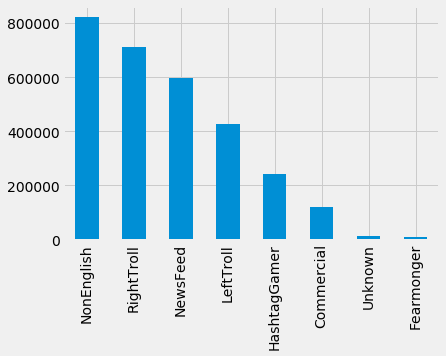

In [78]:
df['account_category'].value_counts().plot(kind='bar');

In [83]:
df['publish_date'] = pd.to_datetime(df['publish_date'])
df['publish_date'].describe()

count                 2946207
unique                 896347
top       2017-08-15 17:01:00
freq                      149
first     2012-02-02 00:35:00
last      2018-05-30 21:01:00
Name: publish_date, dtype: object

In [0]:
df['publish_day'] = df['publish_date'].dt.date

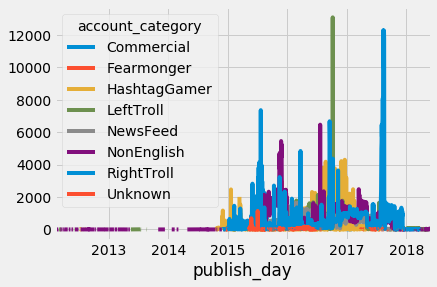

In [102]:
df.groupby('publish_day')['account_category'].value_counts().unstack().plot();


In [128]:
new_df = df.groupby('publish_day')['account_category'].value_counts()
print(new_df.head())

publish_day  account_category
2012-02-02   NonEnglish          4
2012-02-04   NonEnglish          1
2012-02-05   NonEnglish          1
2012-02-06   NonEnglish          2
             LeftTroll           1
Name: account_category, dtype: int64


In [130]:
new_df = new_df.reset_index()
new_df.head()

,publish_day,account_category,0
0,2012-02-02,NonEnglish,4
1,2012-02-04,NonEnglish,1
2,2012-02-05,NonEnglish,1
3,2012-02-06,NonEnglish,2
4,2012-02-06,LeftTroll,1


In [131]:
new_df = new_df.rename(columns= {'publish_day': 'date', 'account_category': 'type', 0 : 'value'})
new_df.head()

,date,type,value
0,2012-02-02,NonEnglish,4
1,2012-02-04,NonEnglish,1
2,2012-02-05,NonEnglish,1
3,2012-02-06,NonEnglish,2
4,2012-02-06,LeftTroll,1


In [120]:
from matplotlib import pyplot as plt
from matplotlib import dates
from datetime import datetime
import sys



AttributeError: ignored

{'axes.labelsize': 24.0,
 'axes.linewidth': 2.5,
 'axes.titlesize': 24.0,
 'font.size': 24.0,
 'grid.linewidth': 2.0,
 'legend.fontsize': 22.0,
 'lines.linewidth': 3.0,
 'lines.markersize': 12.0,
 'patch.linewidth': 2.0,
 'xtick.labelsize': 22.0,
 'xtick.major.size': 12.0,
 'xtick.major.width': 2.5,
 'xtick.minor.size': 8.0,
 'xtick.minor.width': 2.0,
 'ytick.labelsize': 22.0,
 'ytick.major.size': 12.0,
 'ytick.major.width': 2.5,
 'ytick.minor.size': 8.0,
 'ytick.minor.width': 2.0}

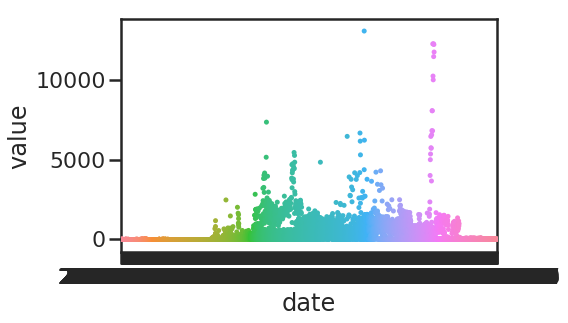

In [119]:
import seaborn as sns

sns.set_style('fivethirtyeight')
sns.set_context("poster")
sns.stripplot(x="date", y="value", data=new_df)
sns.plotting_context()

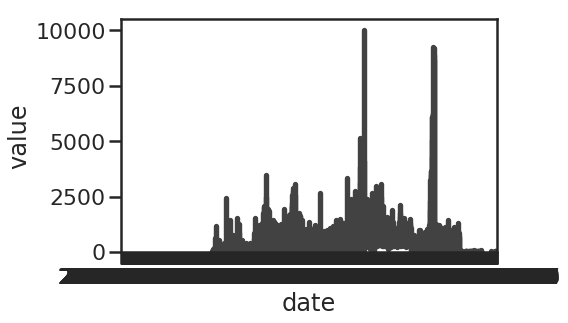

In [122]:
ax = sns.barplot(x='date', y='value', data=new_df)


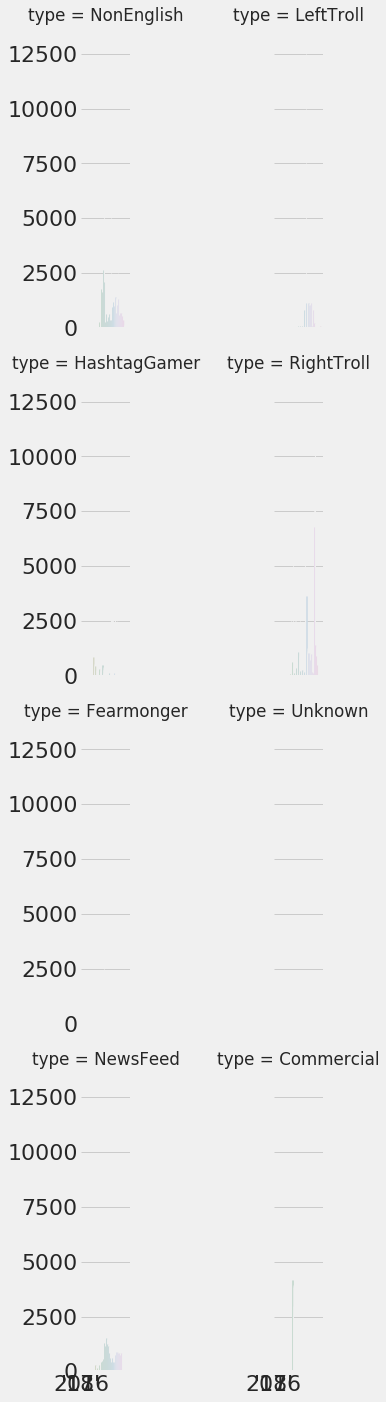

In [134]:
plt.style.use('fivethirtyeight')

g = sns.catplot(x="date", y="value", col="type",
                data=new_df, saturation=.5, col_wrap=2, 
                kind="bar", ci=None, aspect=.6)
(g.set_axis_labels("", "")
 .set_xticklabels(["2016", "'17'", "'18'"])
 .despine(left=True)) 